In [1]:
import pandas as pd
import numpy as np

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#initialization for matplotlib
plt.rcParams["figure.figsize"]=(10,6) #set the figure size

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Reading the data from file

In [2]:
df=pd.read_csv('/kaggle/input/eda-project-analyze-us-citizens/adult_eda.csv')

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Recognizing and Understanding the data

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [6]:
## to check any duplicate rows are there or not
df=df.drop_duplicates()

In [7]:
df.shape

(32537, 15)

In [8]:
## to check the statistical features
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,31735.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.084008,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.575060,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
## Rename the column names
df.columns=df.columns.str.replace("-","_")
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [10]:
## Check the missing values
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

## Fetch for other than NaN values

In [11]:
df.describe(include="object")

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,salary
count,32537,32537,32537,32537,27473,32537,32537,32537,32537
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [12]:
object_col=df.loc[:,df.dtypes == int].columns

In [13]:
object_col

Index(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'], dtype='object')

In [14]:
object_col=df.loc[:,df.dtypes == object].columns

In [15]:
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'salary'],
      dtype='object')

In [16]:
for col in object_col:
    print(col)
    print(df[col].value_counts())
    print('*******************************')

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
*******************************
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
*******************************
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
***

## Univariative Analysis and Multivariative Analsis

#### Univariative means analyzing column by column
#### Numerical feature has only numbers
#### Categorical feature has mainly take piecharts or histograms

##### Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

#### to do list for numeric features:

1. Check the boxplot to see extreme values
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

#### to do list for categoric features:

1. Find the features which contains similar values, examine the similarities and analyze them together
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot

#### Salary,Marital_status,relationship,race,occupation,sex,native-country,workclass are belongs to categorical data.
#### To visualize the categorical data,"countplot" will be used and represented in pie chart.

## Univariative Analysis

#### 1. Categorical data

## Salary

In [17]:
len(df)

32537

In [18]:
df['salary'].value_counts()

<=50K    24698
>50K      7839
Name: salary, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

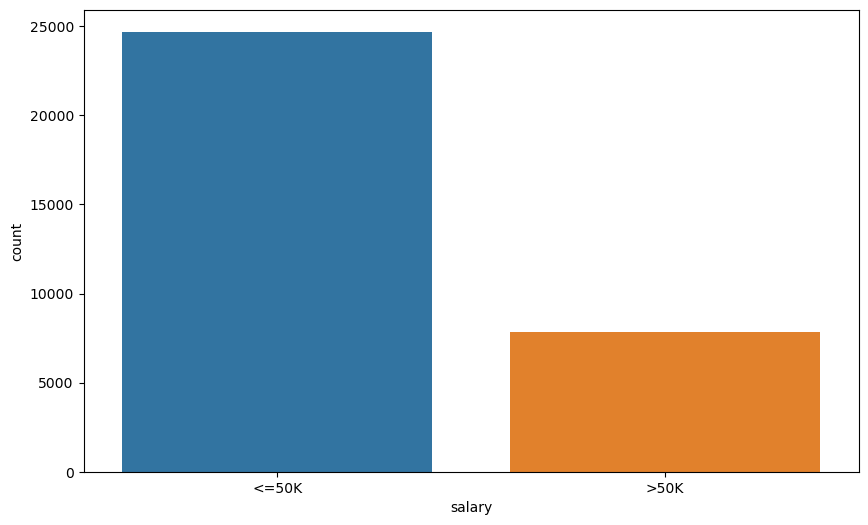

In [19]:
sns.countplot(x="salary",data=df)

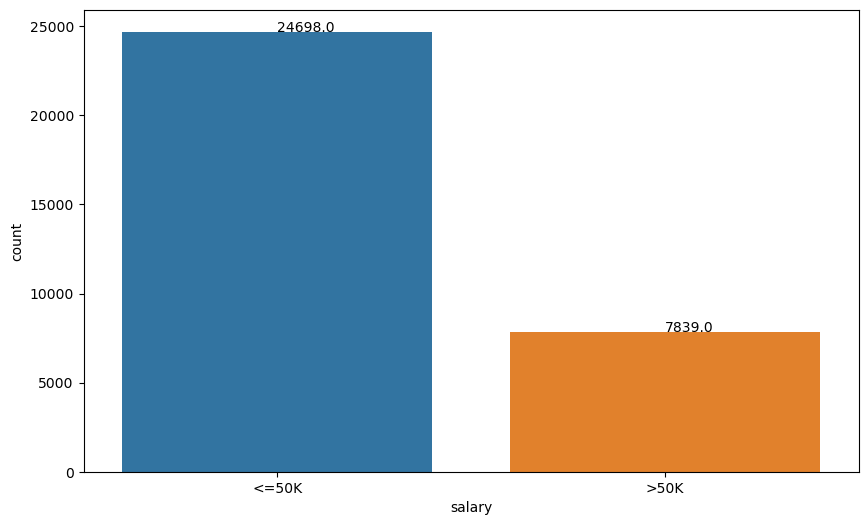

In [20]:
#seaborn countplot

ax = sns.countplot(x="salary",data=df)
for p in ax.patches:
    ax.annotate(p.get_height(),(p.get_x() + 0.4,p.get_height() + 1),fontsize=10)

In [21]:
df['salary'].value_counts()/len(df)

<=50K    0.759074
>50K     0.240926
Name: salary, dtype: float64

In [22]:
percentage_salary=df['salary'].value_counts()/len(df)

([<matplotlib.patches.Wedge at 0x7fec46296230>,
 [Text(-0.7996721738710164, 0.7553306655607218, '<=50k'),
  Text(0.7996721385114347, -0.7553307029960776, '>50k')])

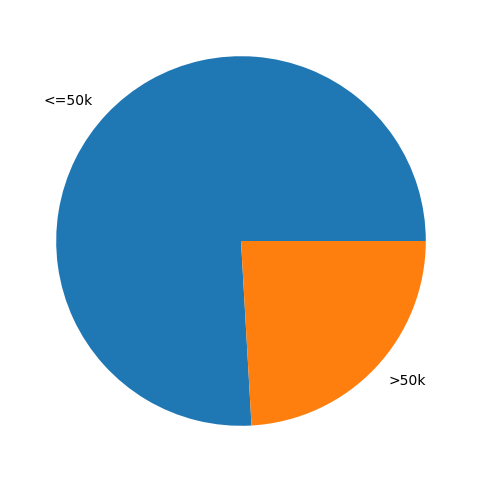

In [23]:
plt.pie(percentage_salary,labels=['<=50k','>50k'])

Text(0.5, 1.0, 'Percentages of the salary levels')

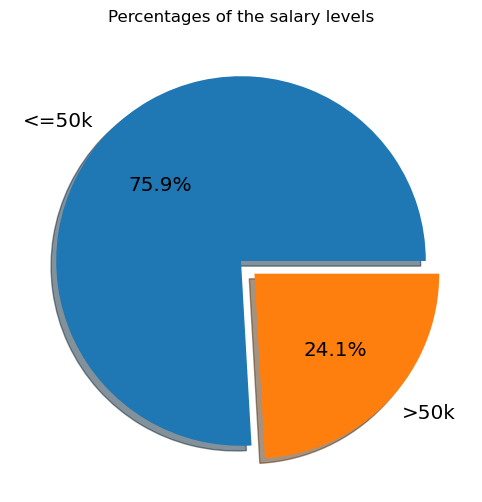

In [24]:
plt.pie(percentage_salary,labels=['<=50k','>50k'],autopct='%.1f%%',explode=[0,0.1],shadow=True,textprops=({'size':'x-large'}))
plt.title("Percentages of the salary levels")

## Conclusion 01: 75.9% op people work for <=50k and 24.1% of people for >50k

## Native Country

In [25]:
df['native_country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

<Axes: xlabel='native_country', ylabel='count'>

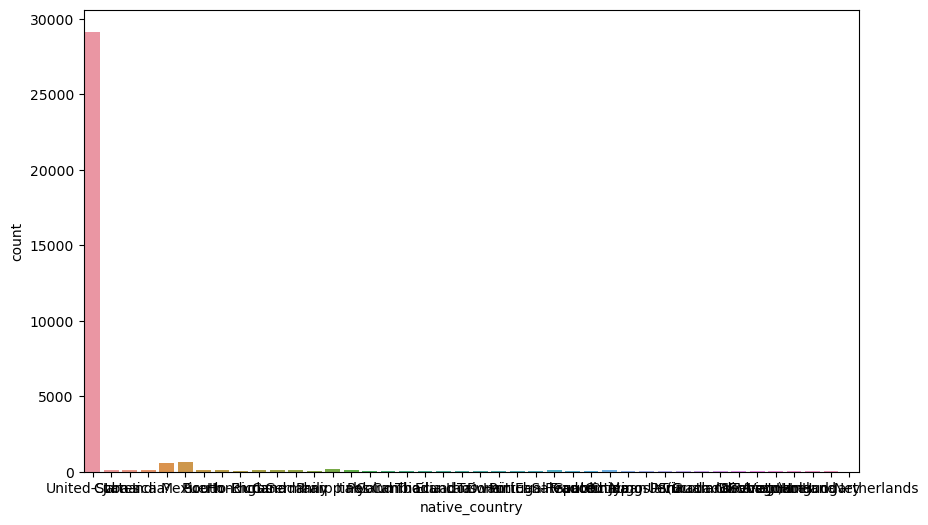

In [26]:
sns.countplot(x="native_country",data=df)

In [27]:
df['native_country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [28]:
df["native_country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [29]:
def mapping_native_country(x):
    if x in ['Cuba', 'Jamaica', 'India', '?',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands']:
        return "Otherstates"
    elif x in ['United-States']:
        return "Highest Population"

In [30]:
df.native_country.apply(mapping_native_country).value_counts()

Highest Population    29153
Otherstates            2745
Name: native_country, dtype: int64

In [31]:
df["native_country"]=df.native_country.apply(mapping_native_country)
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,Highest Population,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,Highest Population,<=50K


In [32]:
df.groupby("native_country")["salary"].value_counts()

native_country      salary
Highest Population  <=50K     21984
                    >50K       7169
Otherstates         <=50K      2108
                    >50K        637
Name: salary, dtype: int64

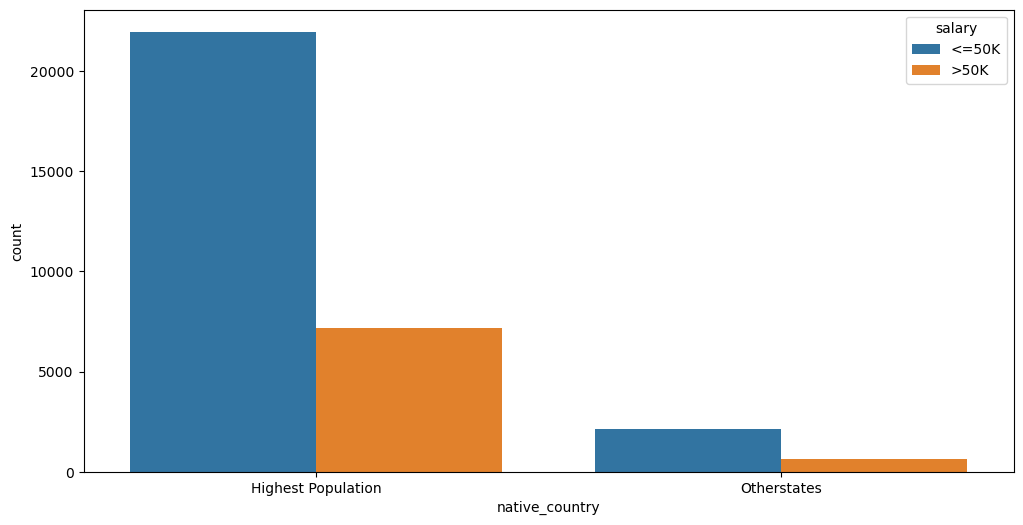

In [33]:
plt.figure(figsize=(12,6))

sns.countplot(x="native_country",data=df,hue="salary");

In [34]:
percentile=(df.groupby("native_country")["salary"]).value_counts()/(df.groupby("native_country")["salary"]).count()
percentile

native_country      salary
Highest Population  <=50K     0.754090
                    >50K      0.245910
Otherstates         <=50K     0.767942
                    >50K      0.232058
Name: salary, dtype: float64

In [35]:
high=((df.groupby("native_country")["salary"]).value_counts()/(df.groupby("native_country")["salary"]).count())[:2]
high

native_country      salary
Highest Population  <=50K     0.75409
                    >50K      0.24591
Name: salary, dtype: float64

In [36]:
other=((df.groupby("native_country")["salary"]).value_counts()/(df.groupby("native_country")["salary"]).count())[2:4]
other

native_country  salary
Otherstates     <=50K     0.767942
                >50K      0.232058
Name: salary, dtype: float64

Text(0, 0.5, 'salary')

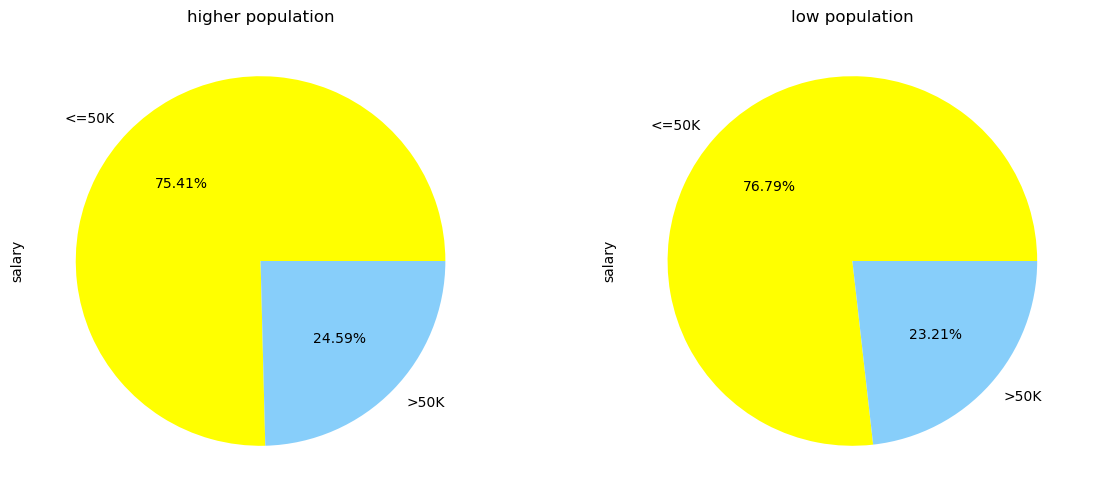

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(14,6))
ax1.pie(x=high,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["yellow","lightskyblue"])
ax1.set_title("higher population")
ax1.set_ylabel("salary")
ax2.pie(x=other,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["yellow","lightskyblue"])
ax2.set_title("low population")
ax2.set_ylabel("salary")

## Sex

<Axes: xlabel='sex', ylabel='count'>

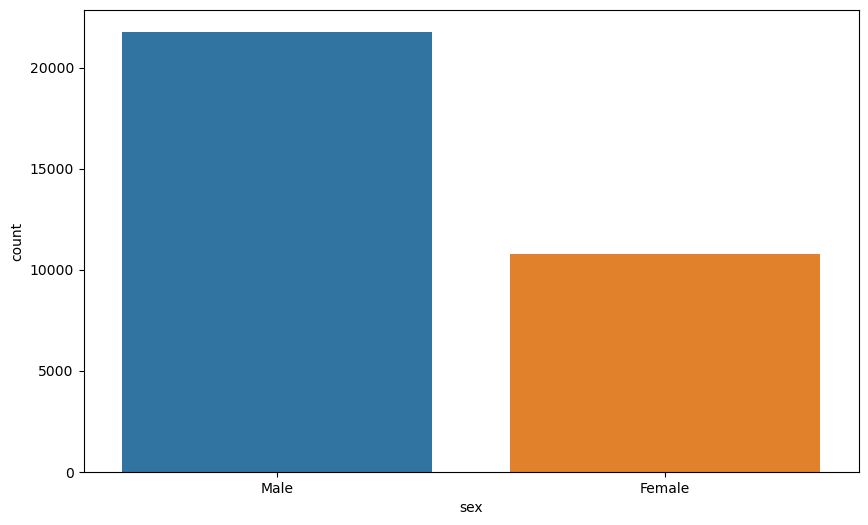

In [38]:
sns.countplot(x="sex",data=df)

In [39]:
df['sex'].value_counts()/len(df)

Male      0.669238
Female    0.330762
Name: sex, dtype: float64

In [40]:
percentage_sex=df['sex'].value_counts()/len(df)

In [41]:
percentage_sex

Male      0.669238
Female    0.330762
Name: sex, dtype: float64

([<matplotlib.patches.Wedge at 0x7fec439cae90>,
 [Text(-0.5576776473476335, 0.9481538069579264, 'Male'),
  Text(0.5576776473476334, -0.9481538069579265, 'Female')])

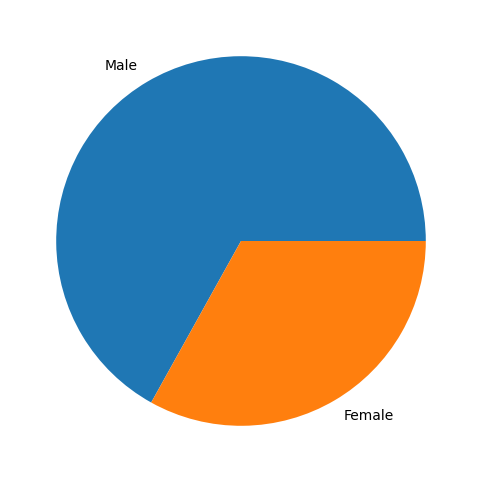

In [42]:
plt.pie(percentage_sex,labels=['Male','Female'])

Text(0.5, 1.0, 'Percentages of the sex')

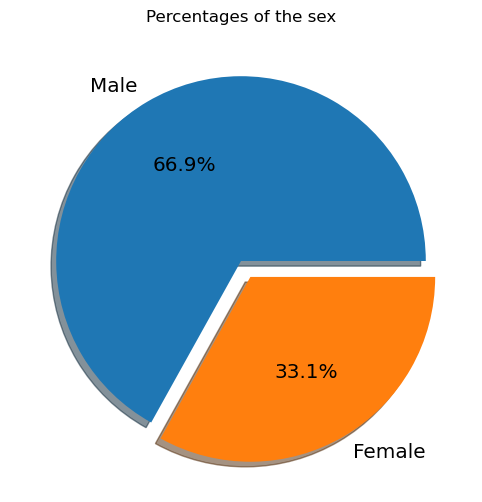

In [43]:
plt.pie(percentage_sex,labels=['Male','Female'],autopct='%.1f%%'
        ,explode=[0,0.1],shadow=True,textprops=({'size':'x-large'}))
plt.title("Percentages of the sex")

## Race

<Axes: xlabel='race', ylabel='count'>

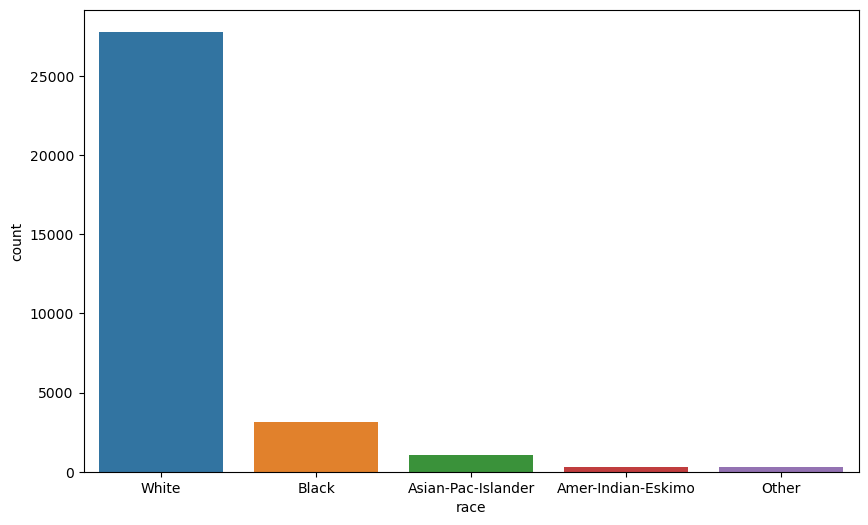

In [44]:
sns.countplot(x="race",data=df)

In [45]:
percentage_race=df['race'].value_counts()/len(df)

In [46]:
percentage_race

White                 0.854258
Black                 0.095952
Asian-Pac-Islander    0.031902
Amer-Indian-Eskimo    0.009558
Other                 0.008329
Name: race, dtype: float64

([<matplotlib.patches.Wedge at 0x7fec439086d0>,
 [Text(-0.9866999380869804, 0.4862337217626409, 'White'),
  Text(0.8989078636465079, -0.6340068238390432, 'Black'),
  Text(1.075231190394067, -0.2321161071613903, 'Asian-Pac_Islander'),
  Text(1.0962712848857874, -0.09049458511350246, 'Amer-Indian-Eskimo'),
  Text(1.0996234532973654, -0.028779523247912504, 'Other')])

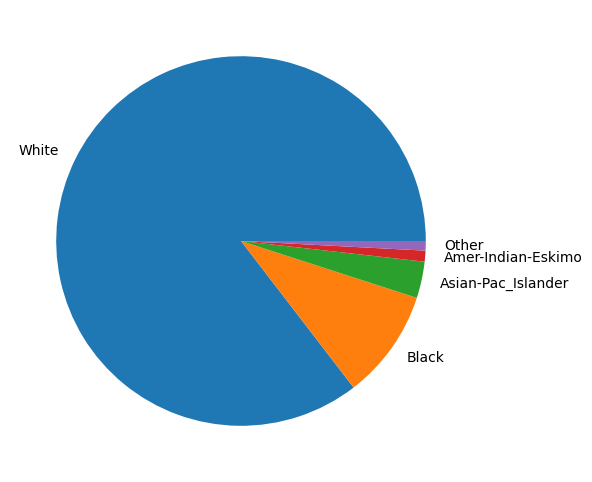

In [47]:
plt.pie(percentage_race,labels=["White","Black","Asian-Pac_Islander","Amer-Indian-Eskimo","Other"])

Text(0.5, 1.0, 'Percentages of the Race')

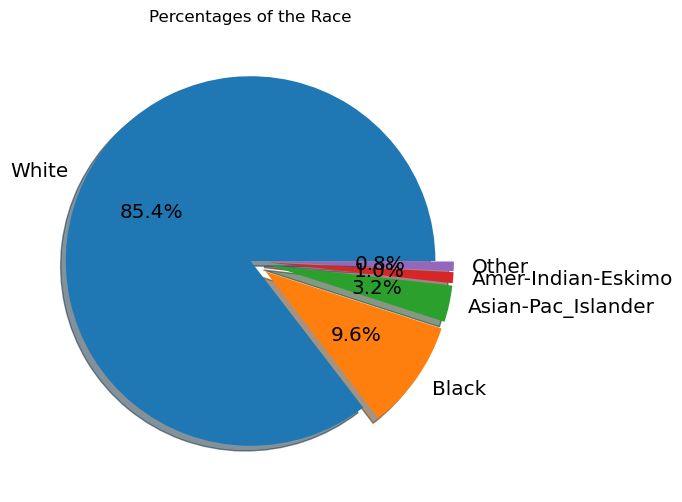

In [48]:
plt.pie(percentage_race,labels=["White","Black","Asian-Pac_Islander","Amer-Indian-Eskimo","Other"],autopct='%.1f%%'
        ,explode=[0,0.1,0.1,0.1,0.1],shadow=True,textprops=({'size':'x-large'}))
plt.title("Percentages of the Race")

## Relationship

<Axes: xlabel='relationship', ylabel='count'>

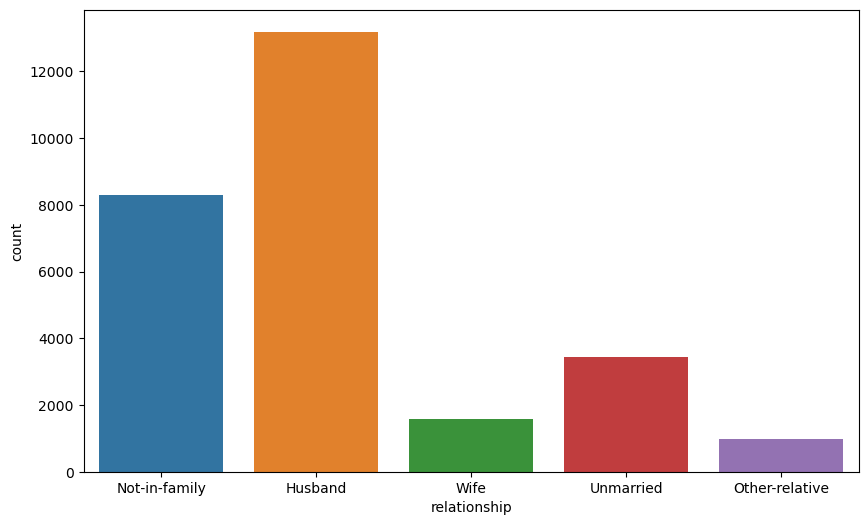

In [49]:
sns.countplot(x="relationship",data=df)

## Marital Status

<Axes: xlabel='marital_status', ylabel='count'>

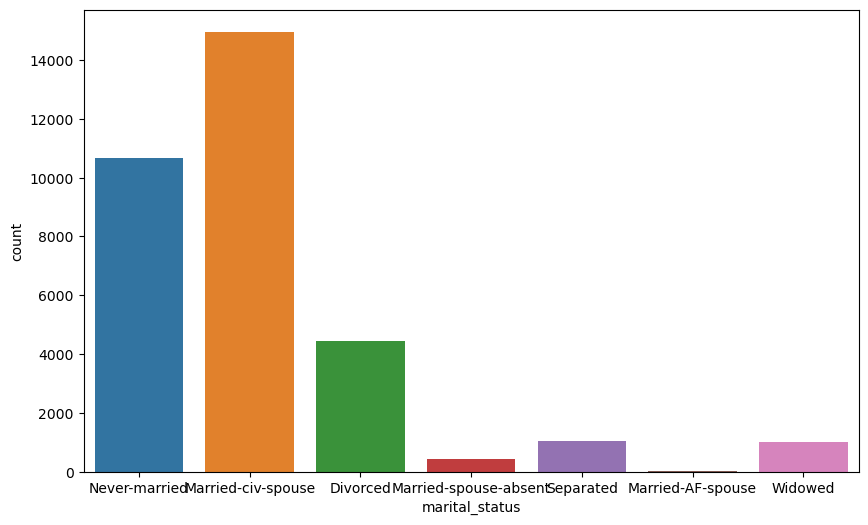

In [50]:
sns.countplot(x="marital_status",data=df)

## Work Class

<Axes: xlabel='workclass', ylabel='count'>

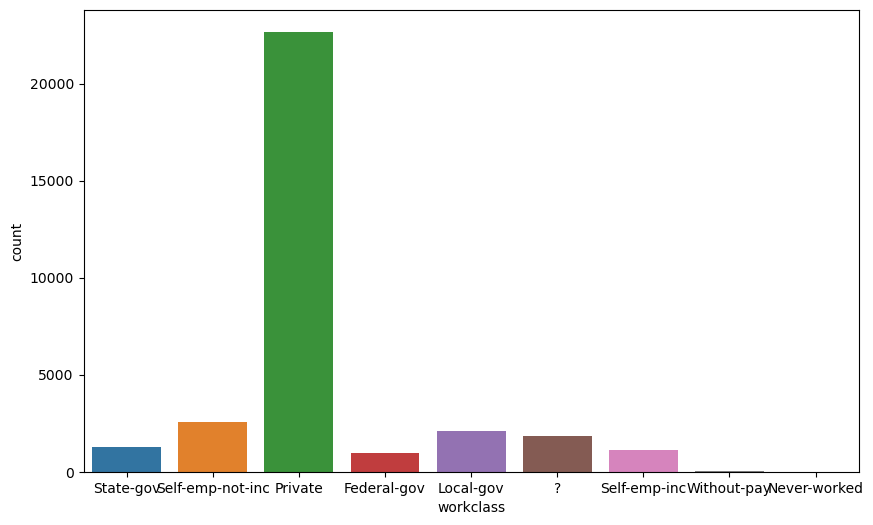

In [51]:
sns.countplot(x="workclass",data=df)

#### 2.Numerical data

#### Age,capital-gain,capital-loss,education-num,fnlwgt does belongs to numerical data.
#### To visualize the numerical data use "boxplot" or "kdeplot" or "histplot".Boxplot can checks extreme values whereas kdeplot/histplot is used to check the distribution of features.

## Age

<Axes: xlabel='age'>

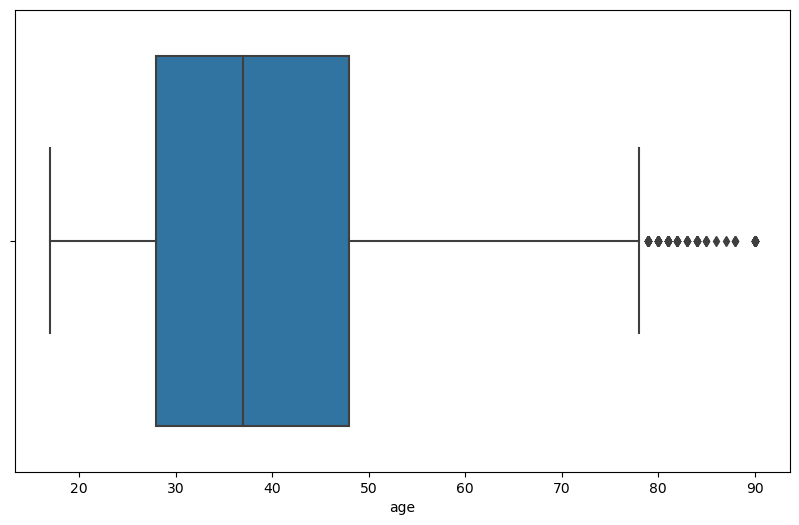

In [52]:
sns.boxplot(x='age',data=df)

<Axes: xlabel='age', ylabel='Count'>

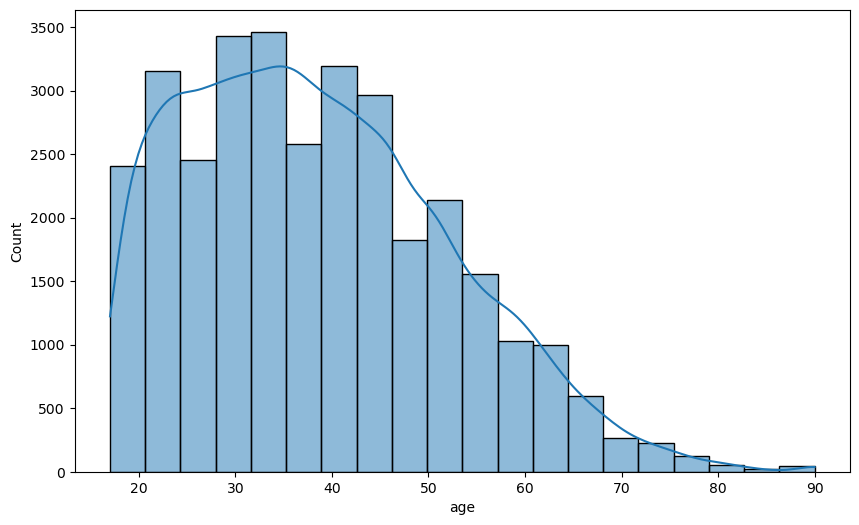

In [53]:
sns.histplot(x='age',data=df,kde=True,bins=20)

### Check the statistical features

In [54]:
df['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<Axes: xlabel='fnlwgt'>

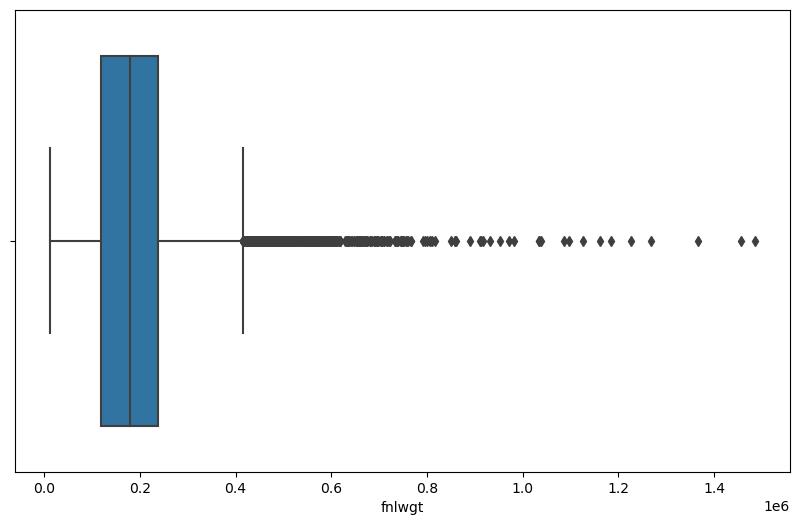

In [55]:
sns.boxplot(x='fnlwgt',data=df)

<Axes: xlabel='fnlwgt', ylabel='Count'>

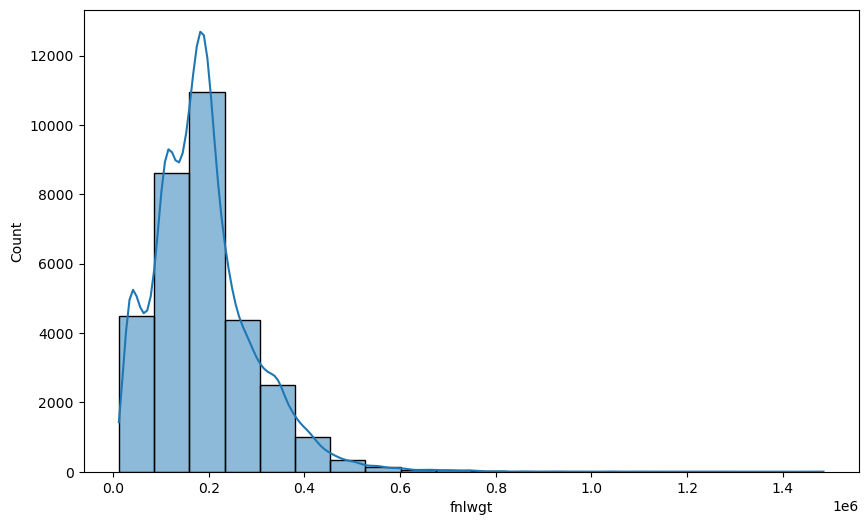

In [56]:
sns.histplot(x='fnlwgt',data=df,kde=True,bins=20)

<Axes: xlabel='education_num'>

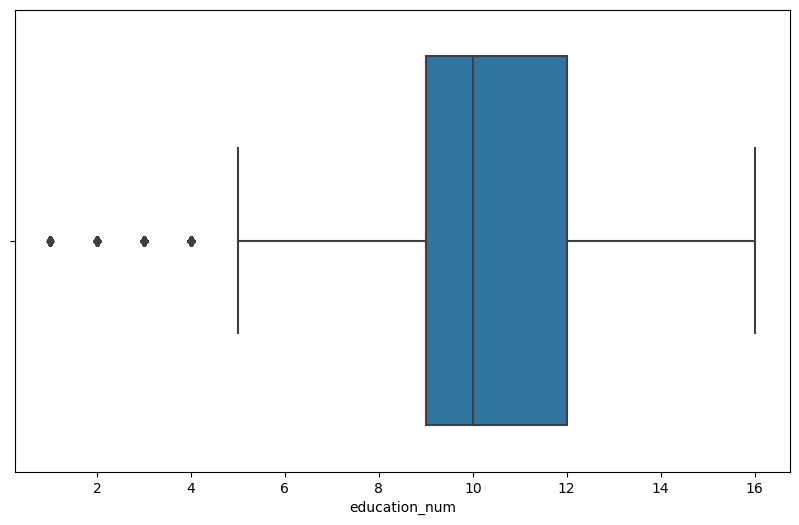

In [57]:
sns.boxplot(x='education_num',data=df)

<Axes: xlabel='education_num', ylabel='Count'>

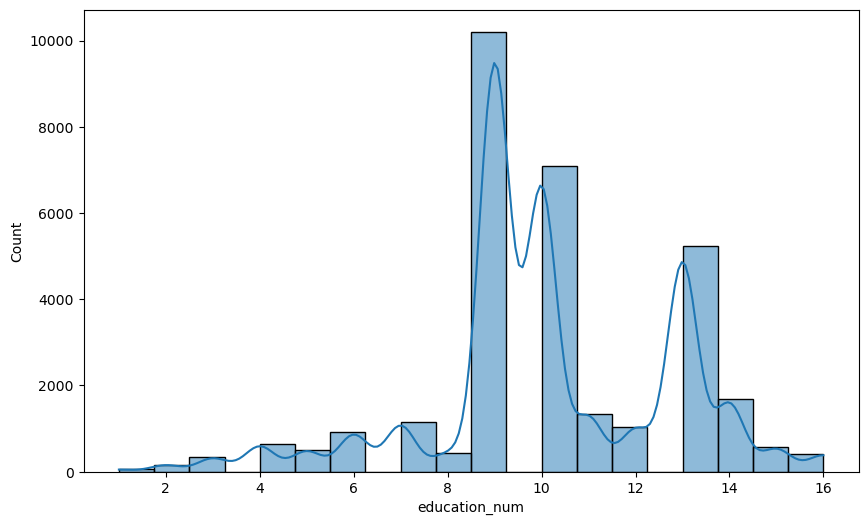

In [58]:
sns.histplot(x='education_num',data=df,kde=True,bins=20)

<Axes: xlabel='capital_gain'>

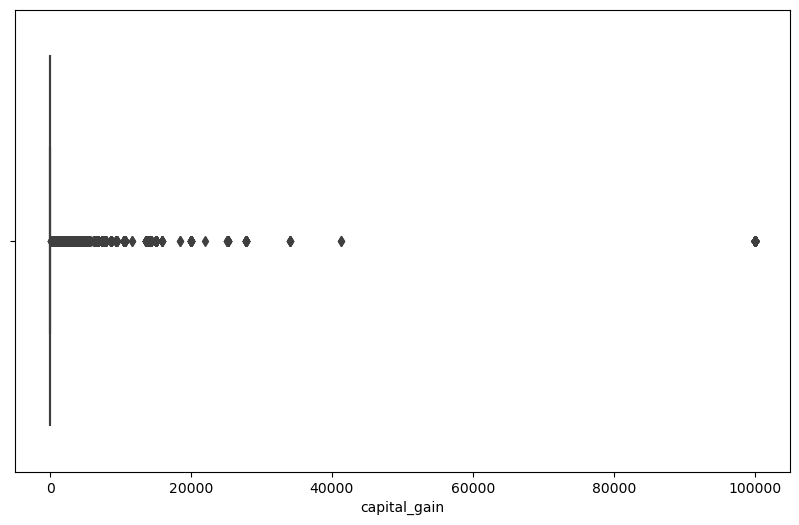

In [59]:
sns.boxplot(x='capital_gain',data=df)

<Axes: xlabel='capital_gain', ylabel='Count'>

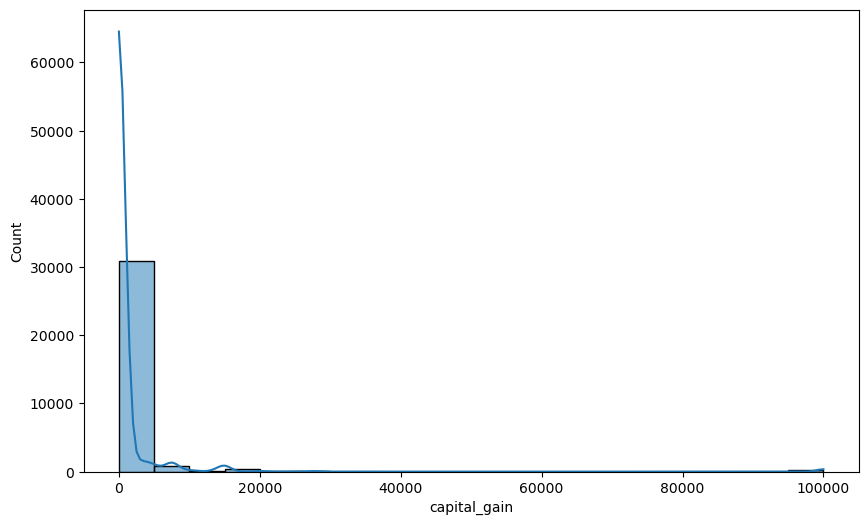

In [60]:
sns.histplot(x='capital_gain',data=df,kde=True,bins=20)

<Axes: xlabel='capital_loss'>

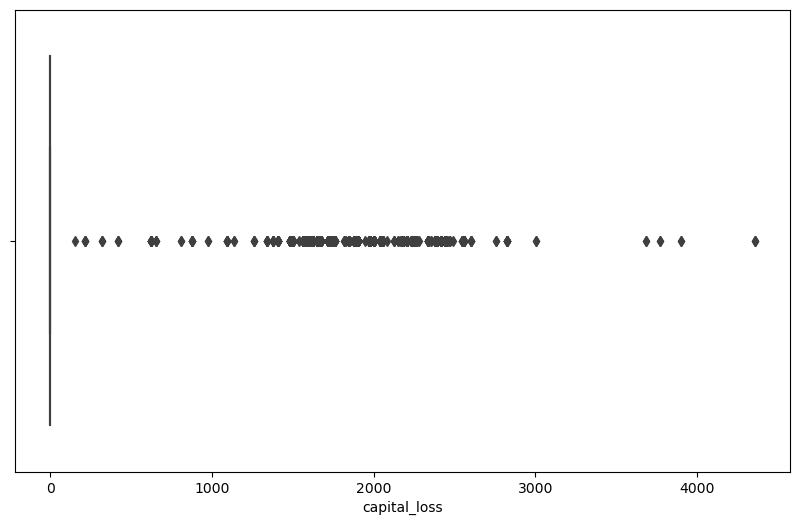

In [61]:
sns.boxplot(x='capital_loss',data=df)

<Axes: xlabel='capital_loss', ylabel='Count'>

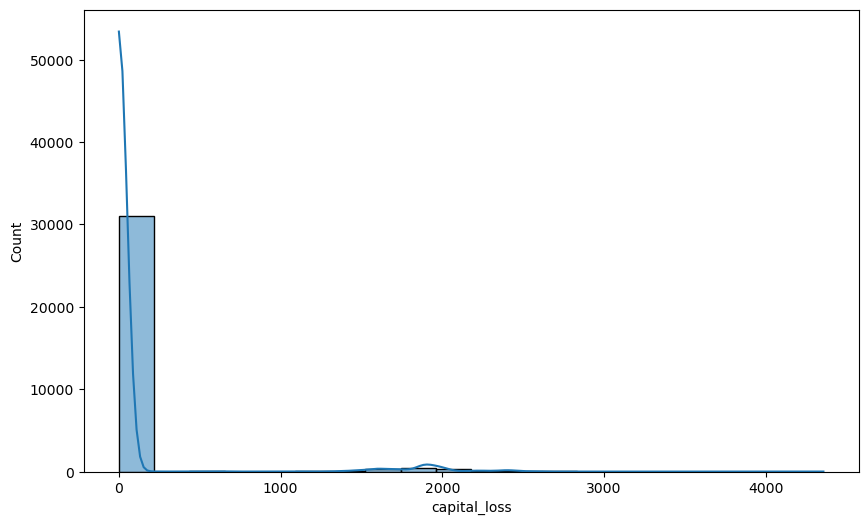

In [62]:
sns.histplot(x='capital_loss',data=df,kde=True,bins=20)

## MultiVariative Analysis

### The MultiVariative Analysis means that having two features.
1. Numerical and categorical feature.
2. Categorical and Categorical feature.

### 1. Numerical And Categorical Data

<Axes: xlabel='age', ylabel='salary'>

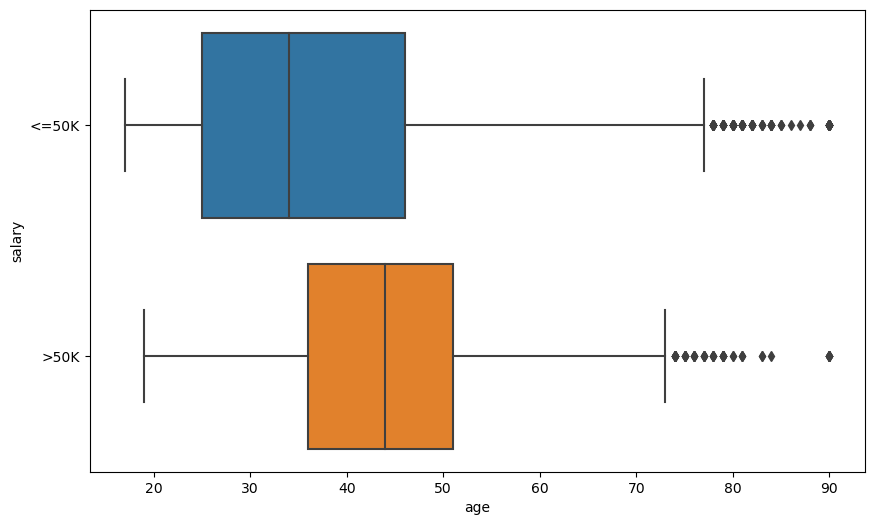

In [63]:
sns.boxplot(x="age",y="salary",data=df)

<Axes: xlabel='age', ylabel='Count'>

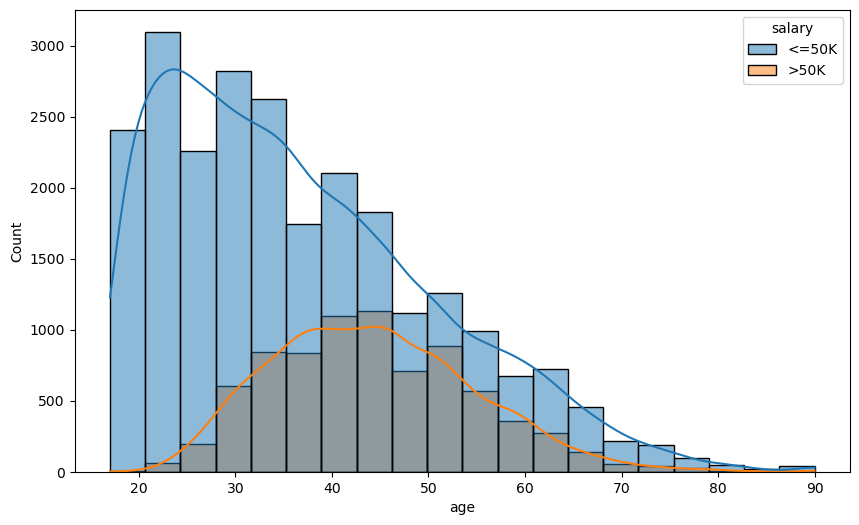

In [64]:
sns.histplot(x='age',data=df,kde=True,hue='salary',bins=20)

/tmp/ipykernel_32/3255707275.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="age",data=df,hue="salary",shade=True)


<Axes: xlabel='age', ylabel='Density'>

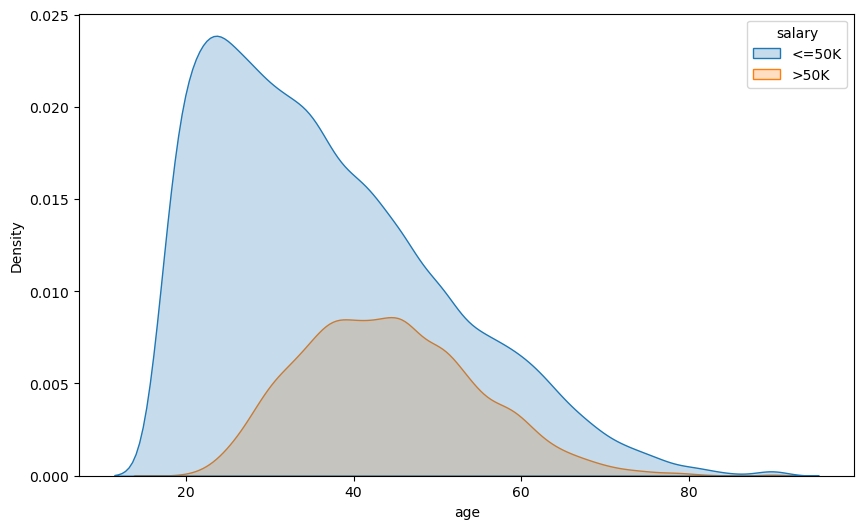

In [65]:
sns.kdeplot(x="age",data=df,hue="salary",shade=True)

In [66]:
df.groupby("salary")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,36.787392,14.017335,17.0,25.0,34.0,46.0,90.0
>50K,7839.0,44.250925,10.520102,19.0,36.0,44.0,51.0,90.0


## Conclusion:The average age of high income group is higher than the low income group

In [67]:
## fnlwgt vs salary

<Axes: xlabel='fnlwgt', ylabel='salary'>

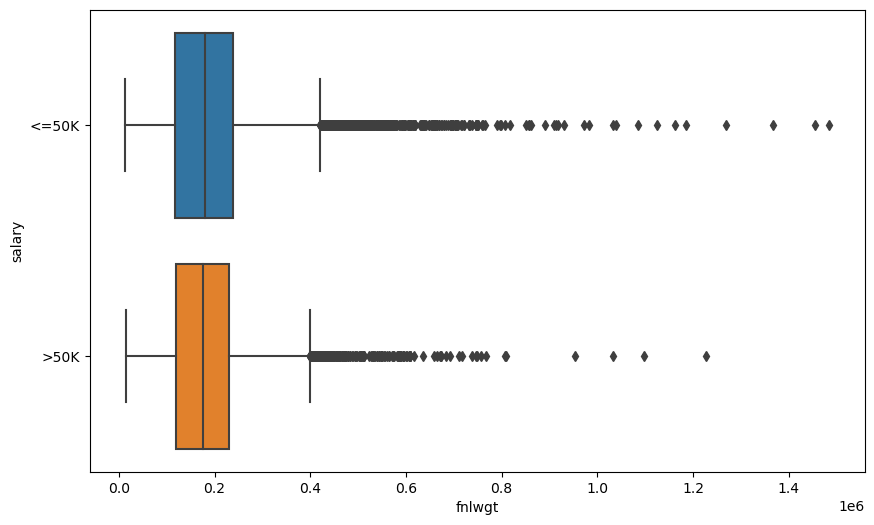

In [68]:
sns.boxplot(x="fnlwgt",y="salary",data=df)

<Axes: xlabel='fnlwgt', ylabel='Count'>

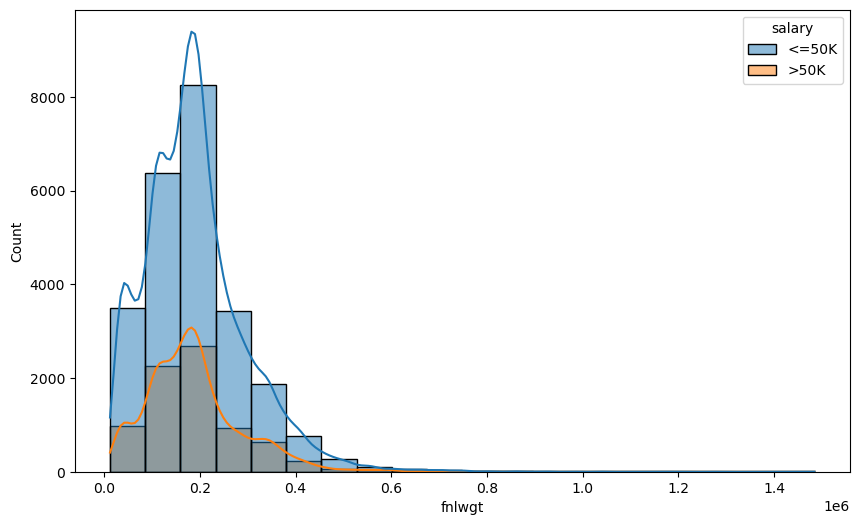

In [69]:
sns.histplot(x='fnlwgt',data=df,kde=True,hue='salary',bins=20)

/tmp/ipykernel_32/952373977.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="fnlwgt",data=df,hue="salary",shade=True)


<Axes: xlabel='fnlwgt', ylabel='Density'>

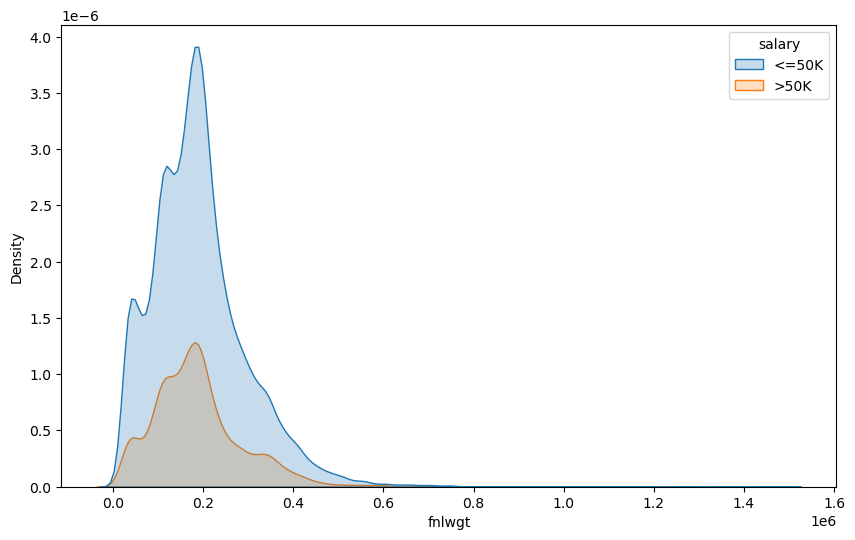

In [70]:
sns.kdeplot(x="fnlwgt",data=df,hue="salary",shade=True)

In [71]:
df.groupby("fnlwgt")["salary"].describe()

,count,unique,top,freq
fnlwgt,,,,
12285,1,1,<=50K,1
13769,1,1,<=50K,1
14878,1,1,>50K,1
18827,1,1,<=50K,1
19214,1,1,<=50K,1
...,...,...,...,...
1226583,1,1,>50K,1
1268339,1,1,<=50K,1
1366120,1,1,<=50K,1


In [72]:
df[df["capital_gain"]==0].shape

(29825, 15)

<Axes: xlabel='capital_gain', ylabel='salary'>

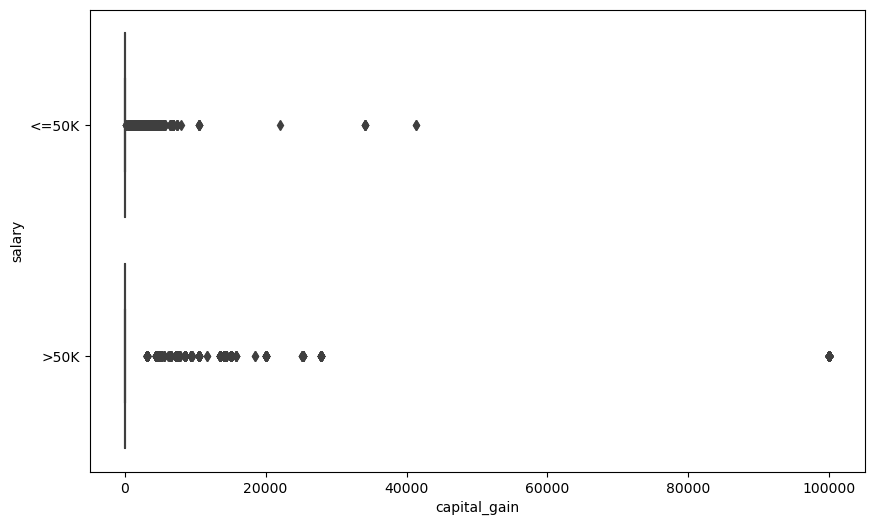

In [73]:
sns.boxplot(x="capital_gain",y="salary",data=df)

<Axes: xlabel='capital_loss', ylabel='salary'>

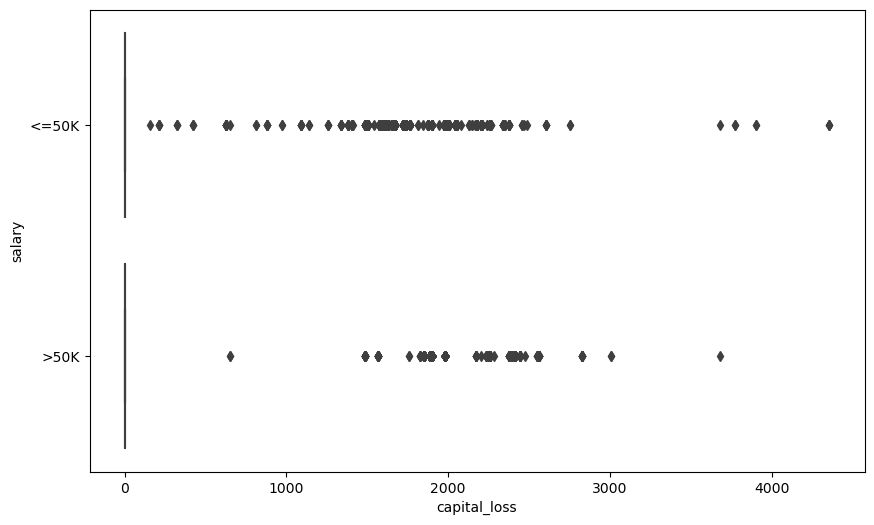

In [74]:
sns.boxplot(x="capital_loss",y="salary",data=df)

<Axes: xlabel='hours_per_week', ylabel='salary'>

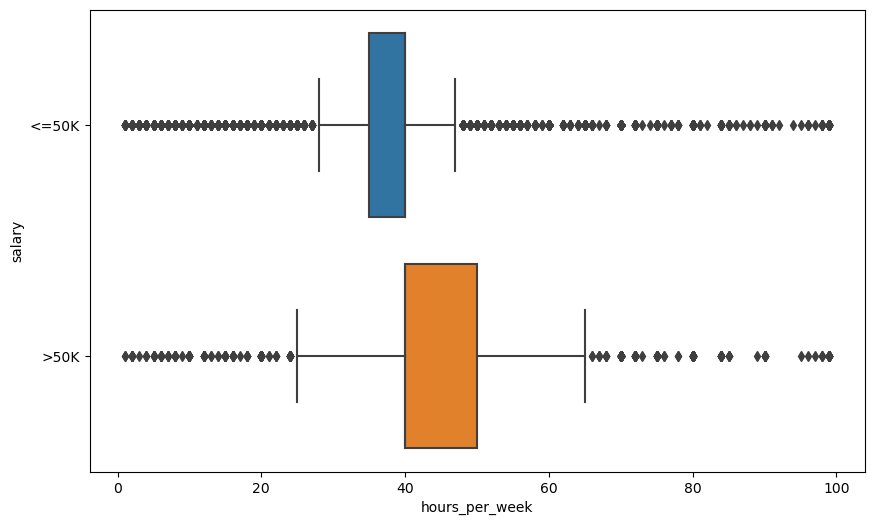

In [75]:
sns.boxplot(x="hours_per_week",y="salary",data=df)

/tmp/ipykernel_32/2408313462.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="hours_per_week",data=df,hue="salary",shade=True)


<Axes: xlabel='hours_per_week', ylabel='Density'>

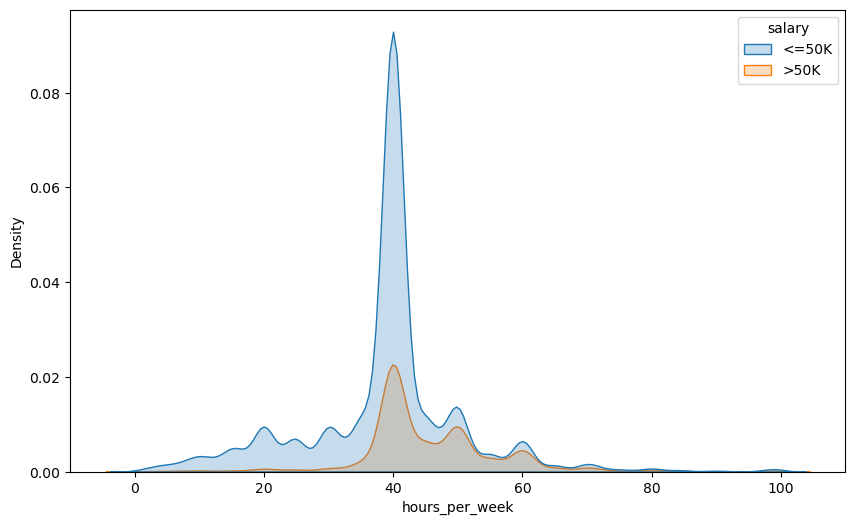

In [76]:
sns.kdeplot(x="hours_per_week",data=df,hue="salary",shade=True)

In [77]:
df.groupby("hours_per_week")["salary"].describe()

,count,unique,top,freq
hours_per_week,,,,
1,20,2,<=50K,18
2,32,2,<=50K,24
3,39,2,<=50K,38
4,54,2,<=50K,51
5,60,2,<=50K,53
...,...,...,...,...
95,2,2,>50K,1
96,5,2,<=50K,4
97,2,2,>50K,1


### 2.Categorical and categorical data

## marital status

In [78]:
df.marital_status.value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [79]:
def mapping_marital_status(x):
    if x in ["Married-civ-spouse","Married-spouse-absent","Married-AF-spouse"]:
        return "Married people"
    elif x in ["Divorced","Separated","Widowed"]:
        return "Separated"
    elif x in ["Never-married"]:
        return "Unmarried"

In [80]:
df.marital_status.apply(mapping_marital_status).value_counts()

Married people    15411
Unmarried         10667
Separated          6459
Name: marital_status, dtype: int64

In [81]:
df["marital_status"] = df.marital_status.apply(mapping_marital_status)
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Unmarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,Highest Population,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married people,Exec-managerial,Husband,White,Male,0,0,13,Highest Population,<=50K


<Axes: xlabel='marital_status', ylabel='count'>

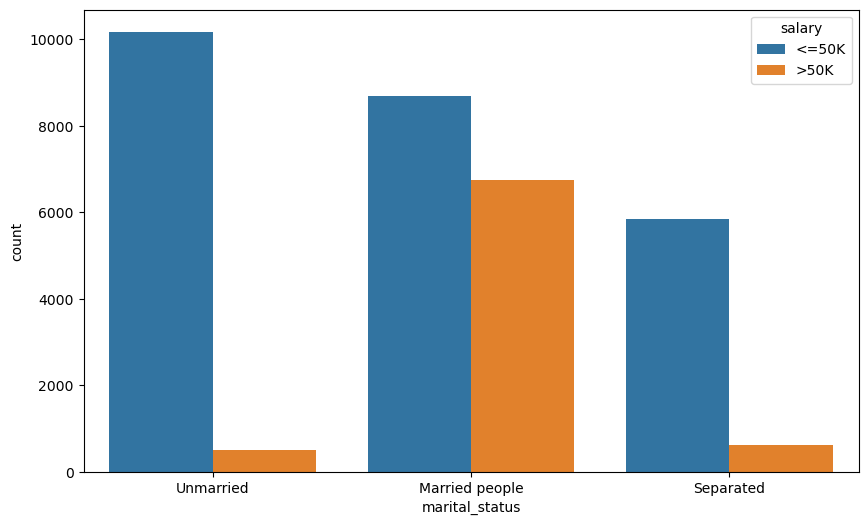

In [82]:
sns.countplot(x="marital_status",data=df,hue="salary")

In [83]:
df.groupby("marital_status")["salary"].value_counts()

marital_status  salary
Married people  <=50K      8677
                >50K       6734
Separated       <=50K      5845
                >50K        614
Unmarried       <=50K     10176
                >50K        491
Name: salary, dtype: int64

In [84]:
(df.groupby("marital_status")["salary"]).count()

marital_status
Married people    15411
Separated          6459
Unmarried         10667
Name: salary, dtype: int64

In [85]:
percentile =(df.groupby("marital_status")["salary"]).value_counts() / (df.groupby("marital_status")["salary"]).count() 
percentile

marital_status  salary
Married people  <=50K     0.563039
                >50K      0.436961
Separated       <=50K     0.904939
                >50K      0.095061
Unmarried       <=50K     0.953970
                >50K      0.046030
Name: salary, dtype: float64

In [86]:
Married=((df.groupby("marital_status")["salary"]).value_counts() / (df.groupby("marital_status")["salary"]).count())[:2]
Married

marital_status  salary
Married people  <=50K     0.563039
                >50K      0.436961
Name: salary, dtype: float64

In [87]:
unmarried=((df.groupby("marital_status")["salary"]).value_counts() / (df.groupby("marital_status")["salary"]).count())[4:]
unmarried

marital_status  salary
Unmarried       <=50K     0.95397
                >50K      0.04603
Name: salary, dtype: float64

In [88]:
sep=((df.groupby("marital_status")["salary"]).value_counts() / (df.groupby("marital_status")["salary"]).count())[2:4]
sep

marital_status  salary
Separated       <=50K     0.904939
                >50K      0.095061
Name: salary, dtype: float64

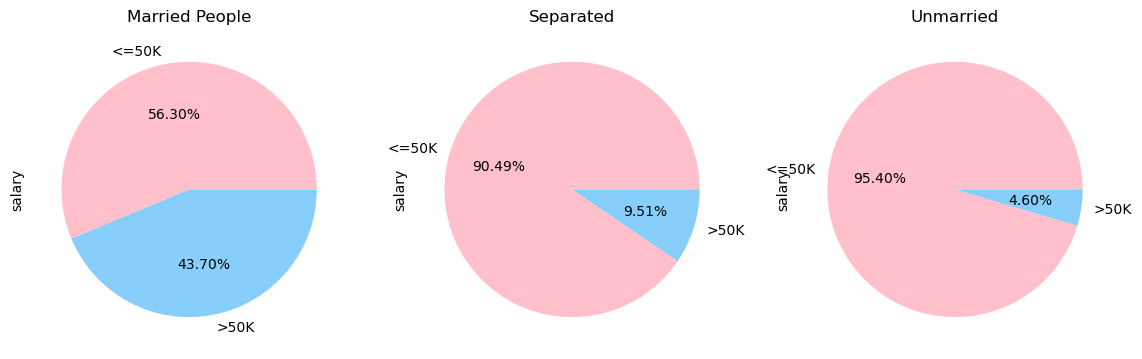

In [89]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(14,6))
ax1.pie(x=Married,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["pink","lightskyblue"])
ax1.set_title("Married People")
ax1.set_ylabel("salary")
ax2.pie(x=sep,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["pink","lightskyblue"])
ax2.set_title("Separated")
ax2.set_ylabel("salary")
ax3.pie(x=unmarried,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["pink","lightskyblue"])
ax3.set_title("Unmarried")
ax3.set_ylabel("salary");

In [90]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [91]:
df.relationship.value_counts()

Husband           13187
Not-in-family      8292
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [92]:
def mapping_relationship(x):
    if x in ["Husband","Wife"]:
        return "Married"
    elif x in ["Not-in-family","Unmarried","Other-relative"]:
        return "Unmarried"

In [93]:
df.relationship.apply(mapping_relationship).value_counts

<bound method IndexOpsMixin.value_counts of 0        Unmarried
1          Married
2        Unmarried
3          Married
4          Married
           ...    
32556      Married
32557      Married
32558    Unmarried
32559         None
32560      Married
Name: relationship, Length: 32537, dtype: object>

In [94]:
df["relationship"]=df.relationship.apply(mapping_relationship)
df["relationship"]

0        Unmarried
1          Married
2        Unmarried
3          Married
4          Married
           ...    
32556      Married
32557      Married
32558    Unmarried
32559         None
32560      Married
Name: relationship, Length: 32537, dtype: object

<Axes: xlabel='relationship', ylabel='count'>

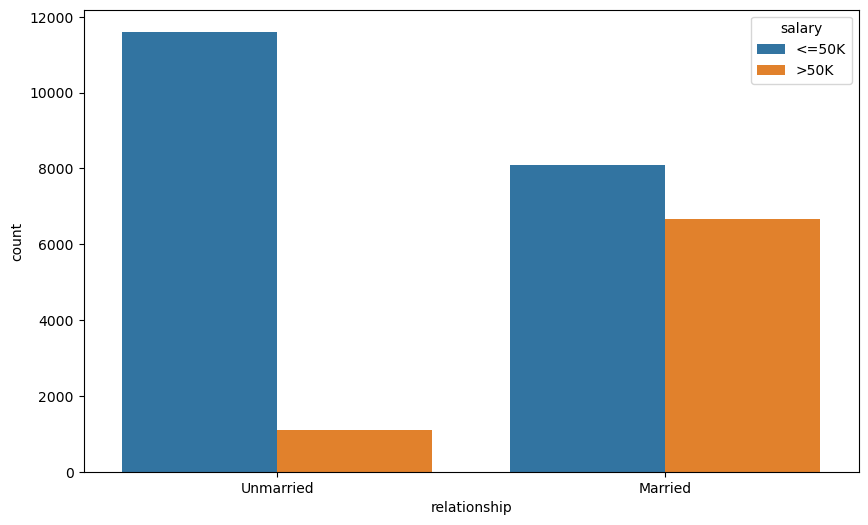

In [95]:
sns.countplot(x="relationship",data=df,hue="salary")

In [96]:
percentile =(df.groupby("relationship")["salary"]).value_counts() / (df.groupby("relationship")["salary"]).count()
percentile

relationship  salary
Married       <=50K     0.548560
              >50K      0.451440
Unmarried     <=50K     0.912643
              >50K      0.087357
Name: salary, dtype: float64

In [97]:
married=((df.groupby("relationship")["salary"]).value_counts() / (df.groupby("relationship")["salary"]).count())[:2]
married

relationship  salary
Married       <=50K     0.54856
              >50K      0.45144
Name: salary, dtype: float64

In [98]:
unmarried=((df.groupby("relationship")["salary"]).value_counts() / (df.groupby("relationship")["salary"]).count())[2:]
unmarried

relationship  salary
Unmarried     <=50K     0.912643
              >50K      0.087357
Name: salary, dtype: float64

Text(0, 0.5, 'salary')

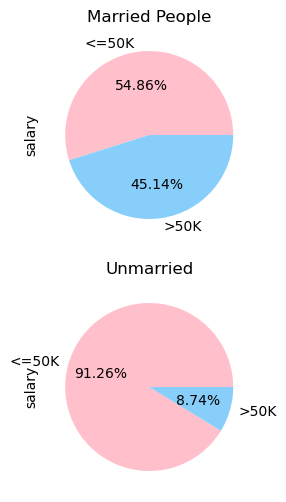

In [99]:
fig, (ax1,ax2) = plt.subplots(nrows=2,figsize=(14,6))
ax1.pie(x=married,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["pink","lightskyblue"])
ax1.set_title("Married People")
ax1.set_ylabel("salary")
ax2.pie(x=unmarried,labels=["<=50K",">50K"],autopct="%.2f%%",colors=["pink","lightskyblue"])
ax2.set_title("Unmarried")
ax2.set_ylabel("salary")

## Data Cleaning

In [100]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Unmarried,Adm-clerical,Unmarried,White,Male,2174,0,40,Highest Population,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married people,Exec-managerial,Married,White,Male,0,0,13,Highest Population,<=50K
2,38,Private,215646,HS-grad,9.0,Separated,Handlers-cleaners,Unmarried,White,Male,0,0,40,Highest Population,<=50K
3,53,Private,234721,11th,7.0,Married people,Handlers-cleaners,Married,Black,Male,0,0,40,Highest Population,<=50K
4,28,Private,338409,Bachelors,13.0,Married people,Prof-specialty,Married,Black,Female,0,0,40,Otherstates,<=50K


In [101]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     639
salary               0
dtype: int64

In [102]:
df=df.dropna(axis=1)

In [103]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital_status    0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
salary            0
dtype: int64

In [104]:
df['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [105]:
df['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [106]:
df.replace(to_replace='?',value=np.nan,inplace=True)

In [107]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
marital_status       0
occupation        1843
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
salary               0
dtype: int64

In [108]:
df['workclass'].fillna('Private')

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32537, dtype: object

In [109]:
df.dropna(inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital_status    0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
salary            0
dtype: int64

## Handling Outliers

<Axes: >

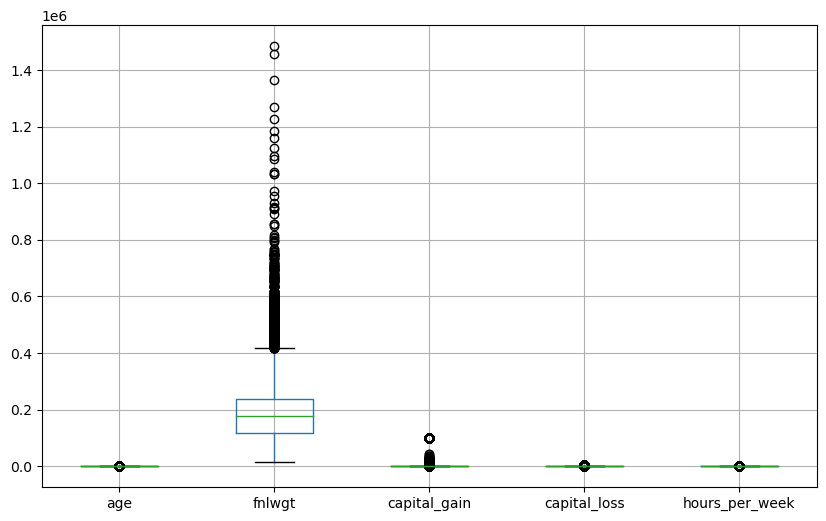

In [110]:
df.boxplot()

<Axes: xlabel='hours_per_week'>

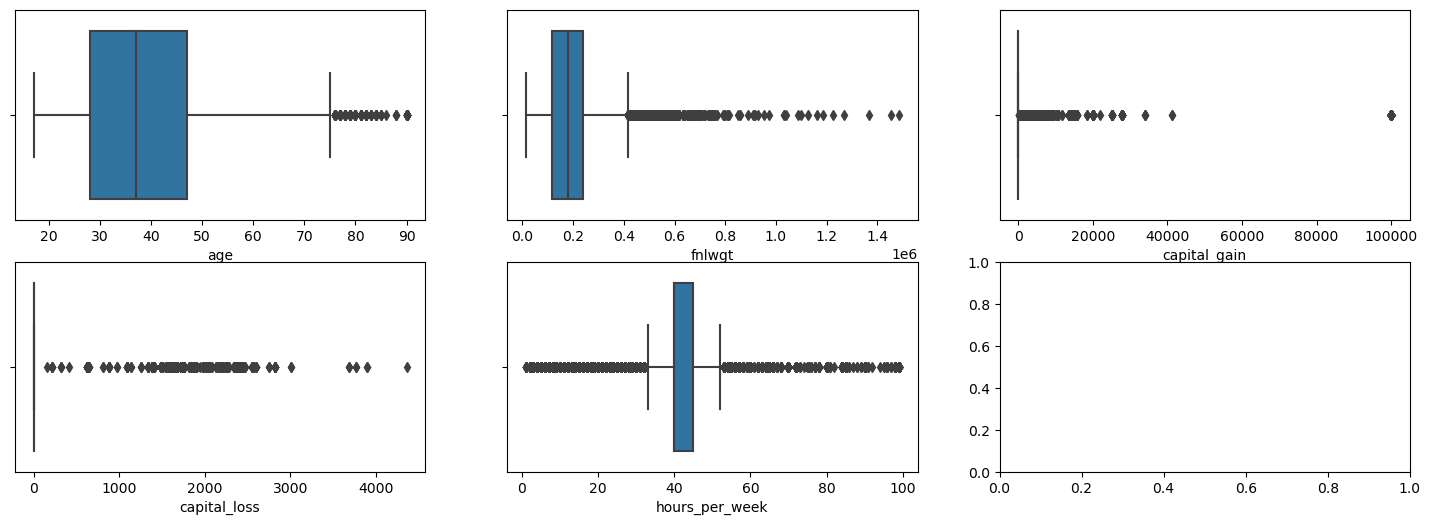

In [111]:
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(18,6))

sns.boxplot(ax=ax[0, 0], data=df, x='age')
sns.boxplot(ax=ax[0, 1], data=df, x='fnlwgt')
sns.boxplot(ax=ax[0, 2], data=df, x='capital_gain')
sns.boxplot(ax=ax[1, 0], data=df, x='capital_loss')
sns.boxplot(ax=ax[1, 1], data=df, x='hours_per_week')


In [112]:
df.corr()

/tmp/ipykernel_32/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076321,0.080398,0.060380,0.101632
fnlwgt,-0.076321,1.000000,-0.000193,-0.010020,-0.022957
capital_gain,0.080398,-0.000193,1.000000,-0.032359,0.079544
capital_loss,0.060380,-0.010020,-0.032359,1.000000,0.053924
hours_per_week,0.101632,-0.022957,0.079544,0.053924,1.000000
